In [37]:
import csv
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
site_all = pd.read_csv('site-all-training-weather-holiday.csv', sep=',')

In [39]:
site_all.head()

,obs_id,ForecastId,Value,Date,Holiday,SiteId,Temperature,HolidayCode,date_numeric
0,6038546.0,1.0,3.266904e+06,2014-09-09,NaN,1.0,20.925000,0,20140909
1,7855117.0,1.0,1.513722e+06,2014-09-18,NaN,1.0,12.962069,0,20140918
2,2088236.0,1.0,1.040529e+06,2014-09-13,NaN,1.0,11.065152,0,20140913
3,882799.0,1.0,2.015528e+06,2014-09-19,NaN,1.0,12.684746,0,20140919
4,1678042.0,1.0,1.381190e+06,2014-10-19,NaN,1.0,7.165000,0,20141019


In [40]:
site_all = site_all.drop(['Holiday'], axis = 1)

In [41]:
site_all.head()

,obs_id,ForecastId,Value,Date,SiteId,Temperature,HolidayCode,date_numeric
0,6038546.0,1.0,3.266904e+06,2014-09-09,1.0,20.925000,0,20140909
1,7855117.0,1.0,1.513722e+06,2014-09-18,1.0,12.962069,0,20140918
2,2088236.0,1.0,1.040529e+06,2014-09-13,1.0,11.065152,0,20140913
3,882799.0,1.0,2.015528e+06,2014-09-19,1.0,12.684746,0,20140919
4,1678042.0,1.0,1.381190e+06,2014-10-19,1.0,7.165000,0,20141019


In [50]:
site_all = site_all[site_all.SiteId != 304]
site_all.describe()

,obs_id,ForecastId,Value,SiteId,Temperature,HolidayCode,date_numeric
count,5.194840e+05,519484.000000,5.194840e+05,519484.000000,519484.000000,519484.000000,5.194840e+05
mean,3.933300e+06,3098.072410,1.110239e+05,140.869605,14.995799,0.108769,2.015671e+07
std,2.270807e+06,2059.610231,2.175526e+07,96.099224,7.749030,1.483412,1.222108e+04
min,1.200000e+01,1.000000,0.000000e+00,1.000000,-19.042373,0.000000,2.009062e+07
25%,1.965730e+06,1126.000000,3.705133e+03,46.000000,9.063855,0.000000,2.015061e+07
50%,3.936024e+06,2666.000000,1.532248e+04,122.000000,15.257407,0.000000,2.016042e+07
75%,5.898075e+06,4636.000000,4.509025e+04,227.000000,21.120450,0.000000,2.016122e+07
max,7.868996e+06,6971.000000,1.567639e+10,303.000000,35.705882,25.000000,2.017120e+07


In [51]:
site_all['SiteId'].median()

122.0

In [52]:
site_all['SiteId'].nunique()

159

In [53]:
site_all['SiteId'].value_counts()

22.0     31255
302.0    27092
33.0     22917
25.0     22745
122.0    18921
123.0    17450
237.0    13754
46.0     13384
49.0     13272
298.0    12840
120.0    12559
284.0    11644
121.0    11338
119.0    11236
295.0    10641
287.0     9912
126.0     9553
16.0      8656
40.0      8197
115.0     7833
26.0      7673
108.0     7233
252.0     7228
255.0     7145
200.0     6440
197.0     6370
27.0      6172
39.0      6009
50.0      5898
106.0     5801
         ...  
213.0       59
193.0       58
205.0       57
248.0       55
240.0       55
145.0       55
189.0       54
253.0       52
130.0       52
102.0       52
244.0       50
172.0       40
170.0       34
245.0       34
148.0       33
206.0       33
110.0       29
51.0        28
156.0       27
90.0        25
94.0        25
211.0       23
161.0       20
157.0       19
182.0        9
93.0         5
17.0         3
229.0        2
18.0         2
180.0        1
Name: SiteId, Length: 159, dtype: int64

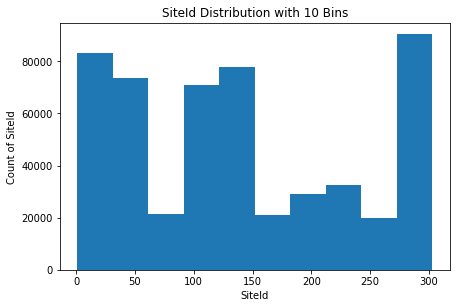

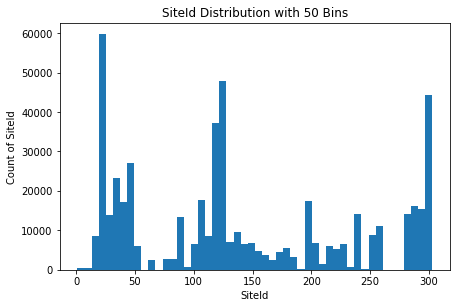

In [71]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211) # two by one grid, first subplot
ax.hist(site_all['SiteId'], bins=10, range=(site_all['SiteId'].min(),site_all['SiteId'].max()))
plt.title('SiteId Distribution with 10 Bins')
plt.xlabel('SiteId')
plt.ylabel('Count of SiteId')
plt.show()

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212) # two by one grid, second subplot
ax.hist(site_all['SiteId'], bins=50, range=(site_all['SiteId'].min(),site_all['SiteId'].max()))
plt.title('SiteId Distribution with 50 Bins')
plt.xlabel('SiteId')
plt.ylabel('Count of SiteId')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(9,7)) # defining two subplots, the method returns two values.
sns.boxplot(x='HolidayCode', y='Value', data=site_all, palette='vlag')
sns.swarmplot(x='HolidayCode', y='Value', data=site_all, size=2, color='0.3')
plt.title('Energy consumption by holiday', size=14)
plt.xlabel('Holiday', size=12)
plt.ylabel('Energy consumption', size=12)
plt.show()

In [72]:
site_all.sort_values(by='Value', ascending=False).head(10)

,obs_id,ForecastId,Value,Date,Holiday,SiteId,Temperature,HolidayCode,date_numeric
376819,3345417.0,4325.0,1.567639e+10,2016-07-22,NaN,213.0,12.002667,0,20160722
350867,617816.0,3707.0,5.776334e+07,2015-11-11,NaN,184.0,18.597015,0,20151111
331535,356508.0,3314.0,2.765276e+07,2015-08-25,NaN,156.0,25.000000,0,20150825
331533,2110278.0,3314.0,2.578527e+07,2015-06-18,NaN,156.0,20.588235,0,20150618
331516,5135501.0,3314.0,2.534974e+07,2014-10-09,NaN,156.0,19.000000,0,20141009
331531,264434.0,3314.0,2.502229e+07,2015-05-28,NaN,156.0,18.062500,0,20150528
331530,4547757.0,3314.0,2.451444e+07,2015-04-10,NaN,156.0,14.588235,0,20150410
331537,3570210.0,3314.0,2.425349e+07,2015-09-09,NaN,156.0,21.062500,0,20150909
331528,7793455.0,3314.0,2.327673e+07,2015-03-13,NaN,156.0,8.823529,0,20150313
331527,3327508.0,3314.0,2.265169e+07,2015-03-03,NaN,156.0,14.000000,0,20150303


In [73]:
site_all['SiteId'].isnull().sum()

0

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
test = pd.read_csv("site-304-training-weather-holiday.csv")

In [77]:
test.head(10)

,Unnamed: 0,obs_id,SiteId_x,Timestamp_x,ForecastId,Value,Date,Holiday,SiteId_y,Timestamp_y,SiteId,Temperature,HolidayCode,date_numeric
0,0,4467860.0,304.0,2015-03-22,6972.0,65679.208180,2015-03-22,NaN,NaN,2015-03-22,304.0,7.404167,0,20150322
1,1,6403331.0,304.0,2015-04-11,6972.0,49537.270984,2015-04-11,NaN,NaN,2015-04-11,304.0,13.007292,0,20150411
2,2,596827.0,304.0,2015-05-27,6972.0,183871.264168,2015-05-27,NaN,NaN,2015-05-27,304.0,18.094681,0,20150527
3,3,1373548.0,304.0,2015-05-30,6972.0,101449.023404,2015-05-30,NaN,NaN,2015-05-30,304.0,18.806593,0,20150530
4,4,4992577.0,304.0,2015-06-02,6972.0,147828.223768,2015-06-02,Republic Day,304.0,2015-06-02,304.0,20.585417,0,20150602
5,5,4469460.0,304.0,2015-06-07,6972.0,83368.734015,2015-06-07,NaN,NaN,2015-06-07,304.0,24.473684,0,20150607
6,6,7137410.0,304.0,2015-06-16,6972.0,234538.553239,2015-06-16,NaN,NaN,2015-06-16,304.0,17.310417,0,20150616
7,7,1225589.0,304.0,2015-07-04,6972.0,173155.682073,2015-07-04,NaN,NaN,2015-07-04,304.0,25.931250,0,20150704
8,8,6075097.0,304.0,2015-07-09,6972.0,323722.343832,2015-07-09,NaN,NaN,2015-07-09,304.0,25.238043,0,20150709
9,9,3673063.0,304.0,2015-07-19,6972.0,93534.772643,2015-07-19,NaN,NaN,2015-07-19,304.0,26.816667,0,20150719


In [78]:
test = test.drop(['Unnamed: 0', 'SiteId_x', 'SiteId_y', 'Timestamp_x', 'Timestamp_y', 'Holiday'], axis = 1)

In [79]:
test = test.drop(['Value'], axis = 1)
test.head(10)

,obs_id,ForecastId,Date,SiteId,Temperature,HolidayCode,date_numeric
0,4467860.0,6972.0,2015-03-22,304.0,7.404167,0,20150322
1,6403331.0,6972.0,2015-04-11,304.0,13.007292,0,20150411
2,596827.0,6972.0,2015-05-27,304.0,18.094681,0,20150527
3,1373548.0,6972.0,2015-05-30,304.0,18.806593,0,20150530
4,4992577.0,6972.0,2015-06-02,304.0,20.585417,0,20150602
5,4469460.0,6972.0,2015-06-07,304.0,24.473684,0,20150607
6,7137410.0,6972.0,2015-06-16,304.0,17.310417,0,20150616
7,1225589.0,6972.0,2015-07-04,304.0,25.931250,0,20150704
8,6075097.0,6972.0,2015-07-09,304.0,25.238043,0,20150709
9,3673063.0,6972.0,2015-07-19,304.0,26.816667,0,20150719


In [80]:
lr = LinearRegression()

In [82]:
# Define our predictors, the columns that we consider useful to our model.
predictors = ["Temperature", "HolidayCode", "date_numeric"]
expected  = site_all["Value"]

# Train the algorithm using all the training data
lr.fit(site_all[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(site_all[predictors])



In [94]:
# Make predictions based on the test data
predictions = lr.predict(test[predictors])

# Frame your submission for Kaggle
test_predictions = pd.DataFrame({
        "SiteId": test["SiteId"],
        "Date": test["date_numeric"],
        "Readable Date": test["Date"],
        "Temperature": test["Temperature"],
        "Energy consumption": predictions
    })
test_predictions.sort_values(by=['Date'], ascending=False).head(100)

,SiteId,Date,Readable Date,Temperature,Energy consumption
27,304.0,20160718,2016-07-18,23.225000,99721.551387
26,304.0,20160713,2016-07-13,19.387234,103411.278085
41,304.0,20160705,2016-07-05,22.807292,100134.592189
40,304.0,20160629,2016-06-29,23.018085,100002.016651
25,304.0,20160620,2016-06-20,20.856250,102086.142236
24,304.0,20160618,2016-06-18,16.467708,106301.982861
39,304.0,20160602,2016-06-02,16.298958,106478.723389
23,304.0,20160601,2016-06-01,16.130435,106641.463382
38,304.0,20160525,2016-05-25,16.327083,106522.470169
37,304.0,20160513,2016-05-13,13.747917,109010.086040


In [96]:
test_verification = pd.read_csv("site-304-training-weather-holiday.csv")

In [98]:
test_verification = test_verification.drop(['Unnamed: 0', 'SiteId_x', 'SiteId_y', 'Timestamp_x', 'Timestamp_y', 'Holiday'], axis = 1)
test_verification.sort_values(by=['Date'], ascending=False).head(100)

,obs_id,ForecastId,Value,Date,SiteId,Temperature,HolidayCode,date_numeric
27,6737384.0,6973.0,270653.766327,2016-07-18,304.0,23.225000,0,20160718
26,5552701.0,6973.0,252654.928972,2016-07-13,304.0,19.387234,0,20160713
41,3349321.0,6973.0,257671.961828,2016-07-05,304.0,22.807292,0,20160705
40,5416140.0,6973.0,254332.428449,2016-06-29,304.0,23.018085,0,20160629
25,5334523.0,6973.0,183745.477483,2016-06-20,304.0,20.856250,0,20160620
24,6073455.0,6973.0,95479.311066,2016-06-18,304.0,16.467708,0,20160618
39,917741.0,6973.0,113400.820541,2016-06-02,304.0,16.298958,0,20160602
23,4552980.0,6973.0,162771.063304,2016-06-01,304.0,16.130435,0,20160601
38,3893644.0,6973.0,158452.043445,2016-05-25,304.0,16.327083,0,20160525
37,3458665.0,6973.0,154284.586231,2016-05-13,304.0,13.747917,0,20160513


In [137]:
#from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [146]:
X = site_all[["Temperature", "date_numeric", "HolidayCode"]]
y = site_all["Value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
log_reg = lr.fit(X_train, y_train)

In [147]:
# Every estimator has a score method that can judge the quality of the 
# fit (or the prediction) on new data. Bigger is better.   
log_reg.score(X_test, y_test)

-0.007933684504776606